# 2 | VARIABLES AND EXPRESSION

><b>Dr J H Klopper</b></p>
>Department of Biostatistics and Bioinformatics</br>
>Milken Institute School of Public Health</br>
>George Washington University

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">This chapter of Algebra for Health Data Science</span> by <span property="cc:attributionName">Dr JH Klopper</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-nd/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-NonCommercial-NoDerivatives 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nd.svg?ref=chooser-v1"></a></p>

## 2.1 Packages used in this chapter

We import the following packages to expand the functions and capabilities of the Python language.

Single we will create a plot in this chapter we import the `pyplot` module from the `matplotlib` package. We will learn about graphs in the last chapter.

In [1]:
from matplotlib import pyplot

We use the `%config` magic command to create high resolution plots on monitors that have high pixel density.

In [2]:
%config InlineBackend.figure_format = 'retina'

We import the numerical Python pakcage `numpy`.

In [3]:
import numpy

Finally, we import the symbolic Python package `sympy`.

In [4]:
import sympy

## 2.2 Introduction

In the previous chapter we familiarized ourselves with the everyday mathematics that we first encountered in school.

In this chapter we develop the vocubulary of mathematics that we will use in the rest of this textbook. In most areas of study, we learn new words and their meaning. By defining what these words mean, we create a common understanding of an area of study. This is no different in matehmatics.

Together with an introduction to vocubulary, we also introduce the concept of the sign referring to the positive or negative nature of a number. We often deal with values that are either more or less than zero in our calculations in the life sciences. It is important to understand how to deal with these values when we use them in our analyses.

## 2.3 The vocabulary of algebra

There are some useful terms and defintions that are used throughout algebra. The two most common _entities_ used in algebra are constants and variables.

__Definition 2.3.1__ A <span style="color:lightgreen">__constant__</span> is a number that has a fixed value. For example the number $3$ is a constant, and so is the number $\pi$.

__Definition 2.3.2__ A <span style="color:lightgreen">__variable__</span> is a symbol, usually a letter, that represents one or more numbers. For example $x$ is a variable. Until we assign a number to a variable, it remains an unknown.

Note that we often use the term __mathematical variable__ to distinguish from a computer variable or a statistical variable.

__Problem 2.3.1__ Determine the constants and the variables used in __Equation 2.3.1__.

$$
3xy - 4x + 2 + a \sin(b \pi)
\tag{Equation 2.3.1}
$$

The numbers $3$, $-4$, $2$, and $\pi$ are constants and the symbols $a$, $b$, $x$ and $y$ are variables.

The `sympy` package allows us to use variables in their mathematical sense. Below we use the `symbols` function to assign the mathematical variables $x$ and $y$ to the computer variables `x` and `y`.

In [5]:
# Create the variables x and y and assign them to the mathematical symbols x and y
x, y = sympy.symbols('x y')

Note that the right-hand side of the assignment is the `symbols` function that contains a string as argument. The `symbols` package allows the elements in the string to be separated by a space. The string-type argument contains two mathematical variables $x$ and $y$. In Python we can assign more than one computer variable at a time. The left-hand side of the assignment therefor contains two computer variables (one for each mathematical variable on the right-hand side).

We can also create a computer variable called `a` and assign it to the mathematical variable $a$. It is typical that mathematical variables such as $a$, $b$, and $c$ represent constants. Below, we use a second argument in the `symbols` function to indicate that `a` and `b` are real numbers.

In [6]:
# We set the real keyword argument to True to indicate that the computer variables a and b are real numbers
a, b = sympy.symbols('a b', real=True)

Together with the `sin` function and the `pi` symbol in `sympy` we can now recreate __Equation 2.3.1__.

In [7]:
# We still have to use multiplication symbols to indicate multiplication
3 * x * y - 4 * x + a * sympy.sin(b * sympy.pi)

a*sin(pi*b) + 3*x*y - 4*x

The `sympy` package generates a different arrangement to the order in which we entered the expression.

__Defintion 2.3.3__ An <span style="color:lightgreen">__expression__</span> is a mathematical combination of numbers and variables, with or without addition and subtraction.

We may state $3x$ and by this we means $3$ times $x$, where $x$ is a variable that can hold different numbers. We usually omit the multiplication symbol and do not write $3 \times x$. We can also multiply variables and write $xy$ indication that we are multiplying $x$ and $y$. As such, $xy$ is an expression, or $xy + x - y$ and $\sin{x + y}$ are also expressions. As stated above, though, we still have to use the `*` multiplication symbol in code.

Given a value for $x$ or values for $x$ and $y$ we can calculate a value for an expression. A good example is the expression that converts degrees Fahrenheit to degrees Celsius. For the variable $F$ that can hold a value in degrees Fahrenheit, we get the following expression in __Equation 2.3.2__.

$$\frac{5}{9}(F-32) \tag{Equation 2.3.2}$$

For $100$<sup>o</sup>F, where $32$ is the value of the variable $F$ and <sup>o</sup>F is the units, we can calculate the temperature value in Celsius.

In [8]:
# Convert 100 degrees F to degrees C
(5/9) * (100 - 32)

37.77777777777778

__Homework 2.3.1__ Calculate the <sup>o</sup>C value for $50$<sup>o</sup>F.

Instead of having to repeat the calculation for different values of $F$, we can create a user-defined function. We do so below and call the function `fahrenheit_to_celsius`. The function takes a single argument for which we use the placeholder `f`. The placeholder computer variable is there to hold the value of $F$ in degrees Fahrenheit when the function is called (used) and a value is entered as argument. The function returns the value in degrees Celsius according to __Equation 2.3.2__.

In [9]:
def fahrenheit_to_celsius(f): # The f computer variable is a placeholder for the value that is passed to the function
    return (5/9) * (f - 32) # The return keyword is used to return a value from a function

We can now pass the value $100$ to the function. It confirms our earlier calculation.

In [10]:
fahrenheit_to_celsius(100)

37.77777777777778

We see that the result is about $38$<sup>o</sup>C. For the sake of interest, we plot the conversion from degrees Fahrenheit to degrees Celcius on the interval $[-10,115]$<sup>o</sup>F.

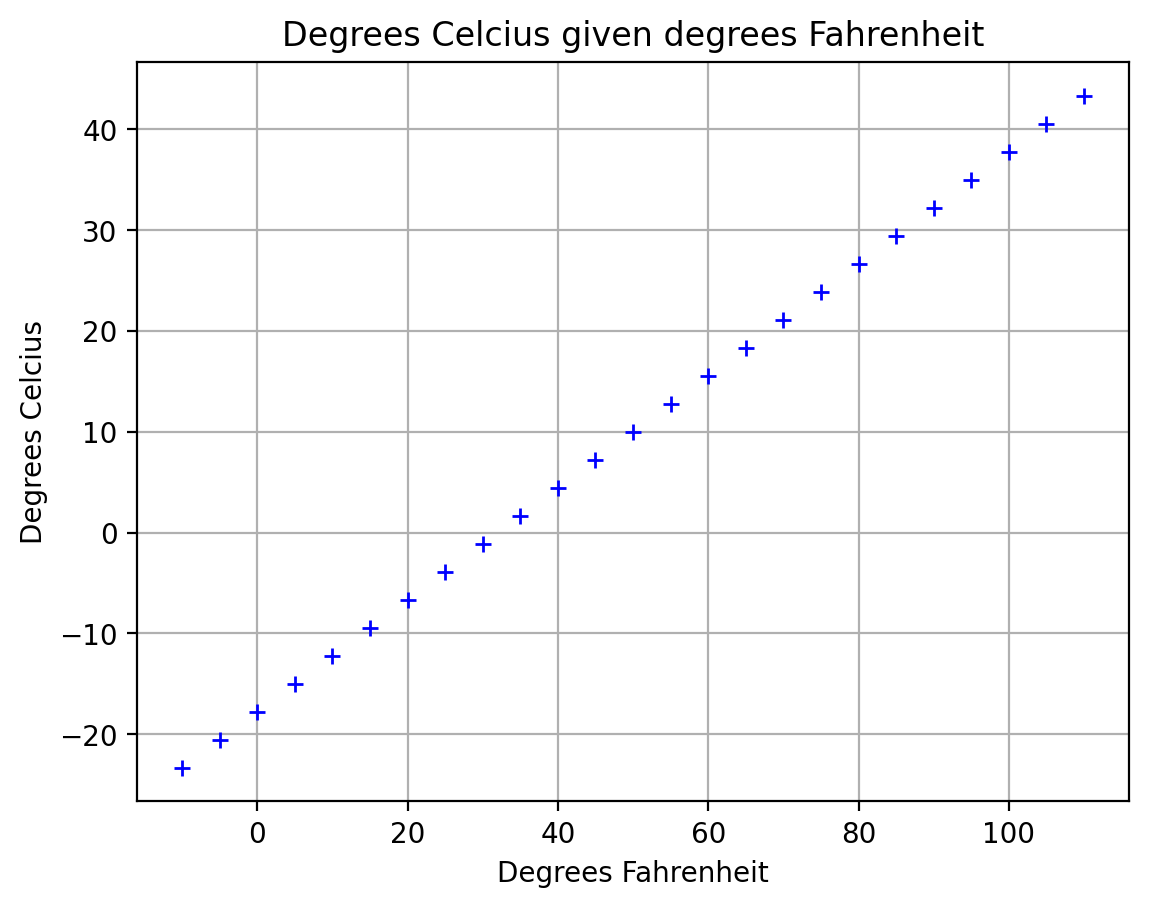

In [11]:
fig, ax = pyplot.subplots()

ax.plot(numpy.arange(-10, 115, 5),
       [fahrenheit_to_celsius(i) for i in numpy.arange(-10, 115, 5)],
       "b+")
ax.set_title("Degrees Celcius given degrees Fahrenheit")
ax.set_xlabel("Degrees Fahrenheit")
ax.set_ylabel("Degrees Celcius")
ax.grid();

__Definition 2.3.4__ A <span style="color:lightgreen">__term__</span> is a part (or whole) of an expression that is separated by addition or subtraction.

In the expression $xy-2x+4$, we have three terms. They are $xy$, $2x$, and $4$.

__Definition 2.3.5__ An <span style="color:lightgreen">__equation__</span> is a mathematical statement that two expressions are equal.

An equation has a left- and a right-hand side and the equal symbol `=` denotes that these sides are equal.

In computer languages, the equal symbol is an assignment operator. To determine if two expressions are equal in Python code, we use the double equal symbol `==`. We can also use the `!=` symbol to denote that two expressions are not equal. Using the `==` symbol, is also referred to as a conditional. A conditional evaluates to `True` or `False`. In the code cell below, we test if $3$ is equal to $4$.

In [12]:
# Determine of 3 is equal to 4
3 == 4

False

The solution is `False` indicating that $3$ is not equal to $4$.

__Homework 2.3.2__ Test if $5$ is not equal to $4$.

__Defintion 2.3.6__ An <span style="color:lightgreen">__operation__</span> is a mathematical procedure that takes one or more values and produces another value using a mathematical operator.

Common algebraic operations are addition $+$, subtraction $-$, multiplication $\times$ or $\cdot$, and division $/$ or $\div$. We can also raise a value to a power, take the square root, and calculate the logarithm. We can also take the sine, cosine, and tangent of a value and calculate the absolute value of a number and much more.

__Defitinition 2.3.7__ An <span style="color:lightgreen">__operator__</span> is a symbol (or word) that indicates an operation to be performed.

__Definition 2.3.8__ A <span style="color:lightgreen">__power__</span> is a number that indicates how many times a base is multiplied by itself.

Powers are written as superscripts, such that $x^{3} = x \times x \times x$ (multiplying the base $x$ three times as indicated by the power).

Below is a table of commonly used symbols in algebra.

| Symbol              | Name                   | Meaning                            |
|:-:                  |:---                    |:---                                |
| $+$                 | Addition               | Add two values                     |
| $-$                 | Subtraction            | Subtract two values                |
| $\times$ or $\cdot$ | Multiplication         | Multiply two values                |
| $\div$ or $/$       | Division               | Divide two values                  |
| $\sqrt{}$           | Square root            | Take the square root of a value    |
| $\vert \; \rvert$   | Absolute value         | Return the positive of any value   |
| $\approx$           | Approximately equal to | Two values are approximately equal |

## 2.4 Working with signed numbers

We often make use of parenthesis, brackets (square brackets), and braces (curly brackets) in algebra. While used to denote the order of arithmetical operations, they are also used do indicate and maintain the sign of constants, variables, terms, and expressions. For example, $-(x + 2)$ is different from $-x + 2$.

The list below shows the sign of the result of an operation given the sign of the variables $a$ and $b$.

- $a - (+b) = a + (-b)$
- $a - (-b) = a + (+b)$
- $-a - (+b) = -a + (-b)$
- $-a - (-b) = -a + (+b)$

__Problem 2.4.1__ Show that $-16-14 = -16 + (-14)$

We use the `==` conditional to show that the two expressions are equal.

In [13]:
-16 - 14 == -16 + (-14)

True

The result is indeed `True`.

By writing $+(-a)$ we actually mean $+1 \times (-a) = -a$ and by writng $-(a)$ we actually mean $-1 \times (a)$. Algebra often uses shorthand notation that can be difficult to intepret. Despite the notation, it is good to remember the following rules of multiplication with signs.

- $\text{A } + \text{ times a } + \text{ is a } +$
- $\text{A } + \text{ times a } - \text{ is a } -$
- $\text{A } - \text{ times a } + \text{ is a } -$
- $\text{A } - \text{ times a } - \text{ is a } +$

In general we can state that a positive times a positive is a positive. A positive times a negative or a negative times a positive is a negative. A negative times a negative is a positive.

We use code to demonstrate example from the list above. The code comments indicate the mathematical expression.

In [14]:
# +3 times +4
3 * 4 # Note that we do not use leading + symbols in Python

12

In [15]:
# +3 times -4
3 * (-4)

-12

In [16]:
# (-3) times 4
(-3) * 4

-12

In [17]:
# (-3) times (-4)
(-3) * (-4)

12

The same rules apply to division. We see more examples using Python code below.

In [18]:
# +3 divided by +4
3 / 4

0.75

In [19]:
# +3 divided by -4
3 / (-4)

-0.75

In [20]:
# -3 divided by +4
(-3) / 4

-0.75

In [21]:
# -3 divided by -4
(-3) / (-4)

0.75

__Definition 2.4.1__ The <span style="color:lightgreen">__even-odd rule__</span> of multiplication and division states that the product or quotient of an even number of negative numbers is positive, and the product or quotient of an odd number of negative numbers is negative.

__Problem 2.4.2__ Determine the sign of the expression below.

$$
\frac{(-3)(2)(2)}{(-3)(-4)(2)(1)(-4)}
$$

There is an even number of negative values and the result will be positive. This is confirmed using code below that calculates the solution.

In [22]:
((-3) * (2) * (2)) / ((-3) * (-4) * (2) * (1) * (-4))

0.125

__Problem 2.4.3__ Determine the sign of the expression below, where it is assumed that all $x,y,z$ are positive real numbers such that $-x$ for instance, is a negative number.

$$
\frac{(-x)(y)(-z)}{(x)(-y)(z)(-x)(-y)}
$$

There is an odd number of negative values and the result will be negative. We can use the `positive` keyword argument in the `symbols` function to indicate that $x$, $y$, and $z$ are positive real numbers.

In [23]:
x, y, z = sympy.symbols('x y z', positive=True)

Now we can enter the expression for the problem. The `sympy` package simplifies the expression and we see that the result is negative.

In [24]:
((-x) * (y) * (-z)) / ((x) * (-y) * (-x) * (-y))

-z/(x*y)